In [6]:
from pyzabbix import ZabbixAPI
import pandas as pd
from requests.auth import HTTPBasicAuth
import requests
import re
import pytz
import datetime
import time
from dateutil.relativedelta import relativedelta
#from datetime import timedelta

In [7]:
zapi = ZabbixAPI("http://10.10.10.20/zabbix")
#zapi.login("Admin", "zabbix")

## total server/VM

In [8]:
get_hosts = zapi.host.get(url = "http://10.10.10.20/zabbix")

#get host_id
df_host = pd.DataFrame(get_hosts)
df_host = df_host.filter(items=['hostid', 'host','name']).drop_duplicates()
print('number of server/VM :' , len(df_host))
df_host

# lst_host_id = list(df_host['hostid'])
# lst_host_id

# lst_host_name = list(df_host['name'])
# lst_host_name

number of server/VM : 40


,hostid,host,name
0,10439,360-Webserver-02,360-Webserver-02
1,10440,360-Webserver-03,360-Webserver-03
2,10441,360-Webserver-04,360-Webserver-04
3,10442,360-Webserver-05,360-Webserver-05
4,10443,360-Webserver-06,360-Webserver-06
5,10444,360-Webserver-07,360-Webserver-07
6,10479,10.10.10.14,Big Data Data node 1
7,10480,10.10.10.15,Big Data Data Node 2
8,10481,10.10.10.16,Big Data Data Node 3
9,10492,10.10.10.44,Datahub


## Find item id

In [9]:
get_items = zapi.item.get(url = "http://10.10.10.20/zabbix")

# get item data
df_item= pd.DataFrame(get_items)
df_item

,itemid,type,snmp_oid,hostid,name,key_,delay,history,trends,status,...,allow_traps,discover,uuid,state,error,parameters,lastclock,lastns,lastvalue,prevvalue
0,10020,0,,10001,Zabbix agent ping,agent.ping,1m,7d,365d,0,...,0,0,,0,,[],0,0,0,0
1,10059,0,,10001,Version of Zabbix agent running,agent.version,1h,7d,0,0,...,0,0,,0,,[],0,0,,
2,10061,5,,10047,Zabbix server: Number of processed numeric (fl...,"zabbix[wcache,values,float]",1m,1w,365d,0,...,0,0,de63f78f36e74361b6c9993d12d8b7c8,0,,[],0,0,0,0
3,10062,5,,10047,Zabbix server: Number of processed character v...,"zabbix[wcache,values,str]",1m,1w,365d,0,...,0,0,b58fdd85cd6a48489d0b983ee8ebe97b,0,,[],0,0,0,0
4,10063,5,,10047,Zabbix server: Number of processed log values ...,"zabbix[wcache,values,log]",1m,1w,365d,0,...,0,0,dae76dc6c4ce4707be7cf9534efc0233,0,,[],0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,46992,18,,10501,sda: Disk utilization,vfs.dev.util[sda],0,7d,365d,0,...,0,0,,0,,[],1703576829,867372167,1.1465724983881318,1.1613625488500205
7478,46993,18,,10501,sda: Disk read time (rate),vfs.dev.read.time.rate[sda],0,7d,365d,0,...,0,0,,0,,[],1703576829,867372167,0,0
7479,46994,18,,10501,sda: Disk read rate,vfs.dev.read.rate[sda],0,7d,365d,0,...,0,0,,0,,[],1703576829,867372167,0,0
7480,46995,18,,10501,sda: Disk average queue size (avgqu-sz),vfs.dev.queue_size[sda],0,7d,365d,0,...,0,0,,0,,[],1703576829,867372167,0.0942442828154869,0.09463445683772166


## Marge host and item

In [10]:
#marge host and items
df_merge = df_host.merge(df_item, left_on='hostid', right_on='hostid')
df_merge = df_merge.rename(columns={"name_x": "host_name", "name_y": "item_name"})
df_merge

,hostid,host,host_name,itemid,type,snmp_oid,item_name,key_,delay,history,...,allow_traps,discover,uuid,state,error,parameters,lastclock,lastns,lastvalue,prevvalue
0,10439,360-Webserver-02,360-Webserver-02,36594,0,,Host name of Zabbix agent running,agent.hostname,1h,7d,...,0,0,,0,,[],1703527794,463584035,zabbix,
1,10439,360-Webserver-02,360-Webserver-02,36595,0,,Zabbix agent ping,agent.ping,1m,7d,...,0,0,,0,,[],1703576815,446355228,1,1
2,10439,360-Webserver-02,360-Webserver-02,36596,0,,Version of Zabbix agent running,agent.version,1h,7d,...,0,0,,0,,[],1703524196,36546893,5.4.1,
3,10439,360-Webserver-02,360-Webserver-02,36597,0,,Maximum number of open file descriptors,kernel.maxfiles,1h,7d,...,0,0,,0,,[],1703524197,61827797,9223372036854775807,0
4,10439,360-Webserver-02,360-Webserver-02,36598,0,,Maximum number of processes,kernel.maxproc,1h,7d,...,0,0,,0,,[],1703524198,93794240,4194304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,10522,10.10.10.164,maholan-web-wordpress,46958,18,,sda: Disk average queue size (avgqu-sz),vfs.dev.queue_size[sda],0,7d,...,0,0,,0,,[],1703576852,296402562,0.20398439527023074,0.2036422669955427
3631,10522,10.10.10.164,maholan-web-wordpress,46959,0,,/: Free inodes in %,"vfs.fs.inode[/,pfree]",1m,7d,...,0,0,,0,,[],1703576859,448267079,97.399755,97.39976
3632,10522,10.10.10.164,maholan-web-wordpress,46960,0,,/: Space utilization,"vfs.fs.size[/,pused]",1m,7d,...,0,0,,0,,[],1703576800,83959941,17.882169,17.875283
3633,10522,10.10.10.164,maholan-web-wordpress,46961,0,,/: Total space,"vfs.fs.size[/,total]",1m,7d,...,0,0,,0,,[],1703576801,92551695,316203216896,316203216896


## Clean data

In [11]:
# cleasing
df_clean = df_merge[df_merge['item_name'].str.contains('cpu uti|memory uti|disk uti', flags=re.IGNORECASE, regex=True)]
df_clean =  df_clean[['hostid','host','host_name','itemid','item_name','lastclock','units','lastvalue','prevvalue','description']]

# change UNIXTIME to local datetime(UTC) and convert to local Bangkok time zone
df_clean['lastclock'] = pd.to_datetime(df_clean['lastclock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 
df_clean

# lst_item_id = list(df_clean['itemid'])
# len(lst_item_id)

C:\Users\jdpsk\AppData\Local\Temp\ipykernel_38064\1464382845.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_clean['lastclock'] = pd.to_datetime(df_clean['lastclock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')


,hostid,host,host_name,itemid,item_name,lastclock,units,lastvalue,prevvalue,description
40,10439,360-Webserver-02,360-Webserver-02,36634,CPU utilization,2023-12-26 14:47:12+07:00,%,0.13546700000000556,0.12088599999999872,CPU utilization in %
41,10439,360-Webserver-02,360-Webserver-02,36635,Memory utilization,2023-12-26 14:47:12+07:00,%,11.377853000000002,11.369457999999995,Memory used percentage is calculated as (100-p...
55,10439,360-Webserver-02,360-Webserver-02,37003,sda: Disk utilization,2023-12-26 14:47:12+07:00,%,0.1351354294381866,0.16612821225673818,This item is the percentage of elapsed time th...
115,10440,360-Webserver-03,360-Webserver-03,36700,CPU utilization,2023-12-26 14:47:12+07:00,%,0.2187320000000028,0.22292099999999948,CPU utilization in %
116,10440,360-Webserver-03,360-Webserver-03,36701,Memory utilization,2023-12-26 14:47:12+07:00,%,11.356444999999994,11.353544,Memory used percentage is calculated as (100-p...
...,...,...,...,...,...,...,...,...,...,...
3534,10521,10.10.10.169,proxy-server-238,46814,Memory utilization,2023-12-26 14:47:12+07:00,%,15.076881,15.061593000000002,Memory used percentage is calculated as (100-p...
3556,10521,10.10.10.169,proxy-server-238,46926,sda: Disk utilization,2023-12-26 14:47:12+07:00,%,1.678398485221087,8.287637890105936,This item is the percentage of elapsed time th...
3604,10522,10.10.10.164,maholan-web-wordpress,46879,CPU utilization,2023-12-26 14:47:12+07:00,%,4.413608999999994,5.408061000000004,CPU utilization in %
3605,10522,10.10.10.164,maholan-web-wordpress,46880,Memory utilization,2023-12-26 14:47:12+07:00,%,26.79979,26.762822999999997,Memory used percentage is calculated as (100-p...


## useful dataframe

In [12]:
df_des =  df_clean[['hostid','host','host_name','itemid','item_name','units','description']]
df_des

,hostid,host,host_name,itemid,item_name,units,description
40,10439,360-Webserver-02,360-Webserver-02,36634,CPU utilization,%,CPU utilization in %
41,10439,360-Webserver-02,360-Webserver-02,36635,Memory utilization,%,Memory used percentage is calculated as (100-p...
55,10439,360-Webserver-02,360-Webserver-02,37003,sda: Disk utilization,%,This item is the percentage of elapsed time th...
115,10440,360-Webserver-03,360-Webserver-03,36700,CPU utilization,%,CPU utilization in %
116,10440,360-Webserver-03,360-Webserver-03,36701,Memory utilization,%,Memory used percentage is calculated as (100-p...
...,...,...,...,...,...,...,...
3534,10521,10.10.10.169,proxy-server-238,46814,Memory utilization,%,Memory used percentage is calculated as (100-p...
3556,10521,10.10.10.169,proxy-server-238,46926,sda: Disk utilization,%,This item is the percentage of elapsed time th...
3604,10522,10.10.10.164,maholan-web-wordpress,46879,CPU utilization,%,CPU utilization in %
3605,10522,10.10.10.164,maholan-web-wordpress,46880,Memory utilization,%,Memory used percentage is calculated as (100-p...


## Load histrory data 

In [13]:
zapi = ZabbixAPI("http://10.10.10.20/zabbix")

#start_date = datetime.datetime.today() + relativedelta(months=-1) #last one month from present
#start_date = datetime.timedelta(days=3) #last 30 days from present
start_date = datetime.datetime.strptime("2023-11-01 00:00:00", "%Y-%m-%d %H:%M:%S") # select by date
# end_date = datetime.datetime.today() 
end_date = datetime.datetime.strptime("2023-12-01 00:00:00", "%Y-%m-%d %H:%M:%S") # select by date

start_unix = time.mktime(start_date.timetuple()) #ช่วงเวลาเริ่ม 
end_unix = time.mktime(end_date.timetuple()) # ช่วงเวลาจบ
print(f"start_date : {start_date} >>  start_unix : {start_unix}")
print(f"end_date : {end_date} >> end_unix : {end_unix}")

df_htr = pd.DataFrame()
for i in lst_item_id:
        method = "trend.get" 
        params = {
                #"output": "extend",
                # "hostids" :10440,
                "itemids" : i ,	
                "time_from": int(start_unix),
                "time_till": int(end_unix),
                #"filter": {
                #    "itemid": [36634,36700]
                #},
                "sortfield": "clock",
                "sortorder": "DESC",
                "limit": 1000000
        }
        print(i)
        result = zapi.do_request(
        method,
        params=params,
        )
        

# print(result['result'])
# print(result_dict)

        df_tmp = pd.DataFrame(result['result'])
        df_htr = pd.concat([df_htr, df_tmp], ignore_index=True)
        # df_test = df_test.append(i, ignore_index=True)
        # df_test['clock'] = pd.to_datetime(df_test['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 

df_htr

start_date : 2023-11-01 00:00:00 >>  start_unix : 1698771600.0
end_date : 2023-12-01 00:00:00 >> end_unix : 1701363600.0


NameError: name 'lst_item_id' is not defined

## avg item

In [ ]:
def perform(avg_month):
    if avg_month > 85:
        performance = "red"
    elif 75 < avg_month <= 85:
        performance = "yellow"
    else:
        performance = "green"
    return performance

In [ ]:
def avg_item(column, item):
    itm_avg = column.astype(float).mean()
    performance = perform(itm_avg)
    return item, itm_avg, performance

In [ ]:
tuple_avg = ()
for i in lst_item_id:
    df_name = f'df_{i}' 
    df_name = df_htr[df_htr['itemid']== str(i)]
    avg_itm = avg_item(df_name['value_avg'],i)  
    # perform(avg_itm)
    # print(avg_itm)
    tuple_avg = tuple_avg + (avg_itm,)
len(tuple_avg)

190

In [ ]:
tuple_avg

(('36634', 0.13424070633379553, 'green'),
 ('36635', 10.434947159454461, 'green'),
 ('37003', 0.2770273502437737, 'green'),
 ('36700', 0.22513862320850672, 'green'),
 ('36701', 11.223748516782248, 'green'),
 ('37028', 0.4379180460428883, 'green'),
 ('36766', 0.18395475034674047, 'green'),
 ('36767', 8.815155915926953, 'green'),
 ('37053', 0.5558750756807717, 'green'),
 ('36832', 0.1529945740175682, 'green'),
 ('36833', 14.260703350208043, 'green'),
 ('37086', 0.29374803212657336, 'green'),
 ('36898', 0.33251221976421647, 'green'),
 ('36899', 17.04064481213592, 'green'),
 ('37119', 1.1582342177349563, 'green'),
 ('36964', 0.04738197605177987, 'green'),
 ('36965', 7.754721952889505, 'green'),
 ('37152', 0.07159028247073511, 'green'),
 ('39665', 2.4493664647711513, 'green'),
 ('39666', 27.22910725182617, 'green'),
 ('39832', 0.01367922881815779, 'green'),
 ('39839', 0.014089674870478134, 'green'),
 ('39846', 0.014534678932667513, 'green'),
 ('39853', 0.01453998608603378, 'green'),
 ('3986

In [ ]:
df_avg = pd.DataFrame(tuple_avg, columns=['itemid', 'item_avg','performance'])
df_avg

,itemid,item_avg,performance
0,36634,0.134241,green
1,36635,10.434947,green
2,37003,0.277027,green
3,36700,0.225139,green
4,36701,11.223749,green
...,...,...,...
185,46814,15.637374,green
186,46926,2.386416,green
187,46879,0.862260,green
188,46880,22.730047,green


In [ ]:
df_total_avg = df_des.merge(df_avg, left_on='itemid', right_on='itemid')
df_total_avg = df_total_avg.filter(items=['hostid', 'host_name','item_name','itemid','item_avg', 'performance']).drop_duplicates()
df_total_avg

,hostid,host_name,item_name,itemid,item_avg,performance
0,10439,360-Webserver-02,CPU utilization,36634,0.134241,green
1,10439,360-Webserver-02,Memory utilization,36635,10.434947,green
2,10439,360-Webserver-02,sda: Disk utilization,37003,0.277027,green
3,10440,360-Webserver-03,CPU utilization,36700,0.225139,green
4,10440,360-Webserver-03,Memory utilization,36701,11.223749,green
...,...,...,...,...,...,...
185,10521,proxy-server-238,Memory utilization,46814,15.637374,green
186,10521,proxy-server-238,sda: Disk utilization,46926,2.386416,green
187,10522,maholan-web-wordpress,CPU utilization,46879,0.862260,green
188,10522,maholan-web-wordpress,Memory utilization,46880,22.730047,green


## DataFrame of each server with month avg data

In [ ]:
# concatenated_df = pd.DataFrame()
def each_host(host_id):
    df_name = df_total_avg[df_total_avg['hostid']==str(host_id)]
    df_name_cpu = df_name[df_name['item_name'].str.contains('CPU utilization', flags=re.IGNORECASE, regex=True)]
    df_name_mem = df_name[df_name['item_name'].str.contains('Memory utilization', flags=re.IGNORECASE, regex=True)]
    df_name_disk = df_name[df_name['item_name'].str.contains('Disk utilization', flags=re.IGNORECASE, regex=True)]

    # if len(df_name_disk) >1:
    # calculate avg disk
    disk_avg =  avg_disk(df_name_disk['item_avg'])
    
    # Drop all other rows except the one specified by index
    df_name_disk = df_name_disk.iloc[0]

    #put the avg disk in dataframe
    df_name_disk = df_name_disk.replace(df_name_disk['item_avg'],disk_avg)
    df_name_disk = df_name_disk.replace(df_name_disk['item_name'],'Disk utilization')
    df_name_disk = pd.DataFrame(df_name_disk)
    df_name_disk = df_name_disk.transpose()
    concatenated_df = pd.concat([df_name_cpu, df_name_mem, df_name_disk], ignore_index=True)

    return concatenated_df 

In [ ]:
each_host(10479)

,hostid,host_name,item_name,itemid,item_avg,performance
0,10479,Big Data Data node 1,CPU utilization,39665,2.449366,green
1,10479,Big Data Data node 1,Memory utilization,39666,27.229107,green
2,10479,Big Data Data node 1,Disk utilization,39832,0.013885,green


In [ ]:
df_big_data_node_1 = df_total_avg[df_total_avg['hostid']=='10479']
df_big_data_node_1
host_name = df_big_data_node_1['host_name'].iloc[0]
print(type(host_name))

<class 'str'>


In [ ]:
def for_each_host(host_id):
    df_name = df_total_avg[df_total_avg['hostid']==str(host_id)]
    host_name = df_name['host_name'].iloc[0]
    df_name_cpu = df_name[df_name['item_name'].str.contains('CPU utilization', flags=re.IGNORECASE, regex=True)]
    df_name_mem = df_name[df_name['item_name'].str.contains('Memory utilization', flags=re.IGNORECASE, regex=True)]
    df_name_disk = df_name[df_name['item_name'].str.contains('Disk utilization', flags=re.IGNORECASE, regex=True)]

    item_avg_tuple = (df_name_cpu['item_avg'],df_name_mem['item_avg'],df_name_disk['item_avg'])
    values_list = [series.values[0] for series in item_avg_tuple]

    if len(df_name_disk) >1:
        values_list[2] =  avg_disk(df_name_disk['item_avg'])
    

    return print('monthly avg (%) of ',host_name,'| id,' , host_id,'\ncpu :', values_list[0], 'status cpu :', perform(values_list[0]), '\nmem :', values_list[1], 'status mem :', perform(values_list[1]), '\ndisk :', values_list[2], 'status disk :', perform(values_list[2]), '\nlen disk', len(df_name_disk['item_avg']))

## Not avalible for 10507 : Maholan Data Platform - Dn1, 10511 : rtarf360-public

In [ ]:
server_data = []
lst_test = [10508,10509]
broken_host_id = {10507,10511}
for i in lst_host_id:
    print(i)
    if int(i) in broken_host_id:
        print('Error : Broken server/VM')
        print('xxxxxxxxxxxxxxxxxxxxxxxxx')
        continue
    value = for_each_host(i)
    print('-------------------------')
print('number of server :' , len(lst_host_id), '\nnumber of avaliable server :', len(lst_host_id)-len(broken_host_id))



10439
monthly avg (%) of  360-Webserver-02 | id, 10439 
cpu : 0.13424070633379553 status cpu : green 
mem : 10.434947159454461 status mem : green 
disk : 0.2770273502437737 status disk : green 
len disk 1
-------------------------
10440
monthly avg (%) of  360-Webserver-03 | id, 10440 
cpu : 0.22513862320850672 status cpu : green 
mem : 11.223748516782248 status mem : green 
disk : 0.4379180460428883 status disk : green 
len disk 1
-------------------------
10441
monthly avg (%) of  360-Webserver-04 | id, 10441 
cpu : 0.18395475034674047 status cpu : green 
mem : 8.815155915926953 status mem : green 
disk : 0.5558750756807717 status disk : green 
len disk 1
-------------------------
10442
monthly avg (%) of  360-Webserver-05 | id, 10442 
cpu : 0.1529945740175682 status cpu : green 
mem : 14.260703350208043 status mem : green 
disk : 0.29374803212657336 status disk : green 
len disk 1
-------------------------
10443
monthly avg (%) of  360-Webserver-06 | id, 10443 
cpu : 0.3325122197642

# Plot donut

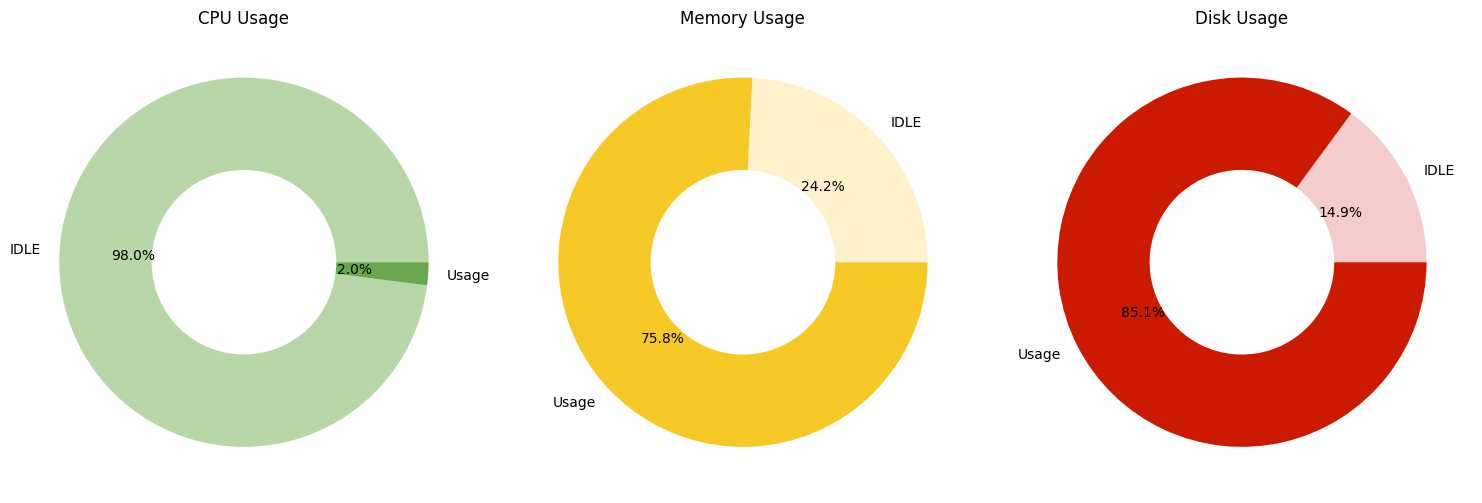

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Colors for each category
colors_g = [ '#b7d7a8', '#6aa84f']
colors_r = [ '#f5cccc', '#cc1a01']
colors_y = [ '#fdf2cc', '#f7c927']

total_value_cpu = 16
usage_value_cpu = 0.32

total_value_mem = 128
usage_value_mem = 97.04

total_value_disk = 600
usage_value_disk = 510.5

def remain_value(usage_value, total_value):
    remain = total_value - usage_value
    return remain

def cal_color(usage_value, total_value):
    percent = usage_value/total_value *100
    if percent > 85:
       color_perform = colors_r
    elif percent < 75:
        color_perform = colors_g
    else: color_perform = colors_y

    return color_perform

remain_value_cpu = remain_value( usage_value_cpu, total_value_cpu)
remain_value_mem = remain_value( usage_value_mem, total_value_mem)
remain_value_disk = remain_value( usage_value_disk, total_value_disk)

colors_cpu = cal_color(usage_value_cpu, total_value_cpu)
colors_mem = cal_color(usage_value_mem, total_value_mem)
colors_disk = cal_color(usage_value_disk, total_value_disk)

# Example data
labels = ['IDLE', 'Usage']
sizes_cpu = [remain_value_cpu,usage_value_cpu]  # Percentages adding up to 100%
sizes_mem = [remain_value_mem,usage_value_mem]  # Percentages adding up to 100%
sizes_disk = [remain_value_disk,usage_value_disk]  # Percentages adding up to 100%

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))

# Plot the first donut chart
plt.subplot(1, 3, 1)
plt.pie(sizes_cpu, labels=labels, autopct='%1.1f%%', colors=colors_cpu, wedgeprops=dict(width=0.5))
plt.title('CPU Usage')

# Plot the second donut chart
plt.subplot(1, 3, 2)
plt.pie(sizes_mem, labels=labels, autopct='%1.1f%%', colors=colors_mem, wedgeprops=dict(width=0.5))
plt.title('Memory Usage')

# Plot the third donut chart
plt.subplot(1, 3, 3)
plt.pie(sizes_disk, labels=labels, autopct='%1.1f%%', colors=colors_disk, wedgeprops=dict(width=0.5))
plt.title('Disk Usage')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
